In [5]:
import requests
import datetime as dt
from matplotlib import pyplot

In [2]:
site = "2710924" #Standort ID
api_key = "1KP4K9CZOFOS9XZU3ZXHWM24RJTXCWAL"

In [14]:
#current PowerFlow
urlpowerflow = "https://monitoringapi.solaredge.com/site/" + site + "/currentPowerFlow?api_key=" + api_key
power = requests.get(urlpowerflow)
if power.status_code == 200:
    print(power.text)

{"siteCurrentPowerFlow":{"updateRefreshRate":3,"unit":"kW","connections":[{"from":"PV","to":"Load"},{"from":"GRID","to":"Load"},{"from":"PV","to":"Storage"}],"GRID":{"status":"Active","currentPower":0.05},"LOAD":{"status":"Active","currentPower":3.01},"PV":{"status":"Active","currentPower":4.02},"STORAGE":{"status":"Charging","currentPower":1.06,"chargeLevel":38,"critical":false}}}


In [15]:
#generated Powerflow cumulated
startdate = "2022-2-9"
enddate = "2022-4-14"
urlgen = "https://monitoringapi.solaredge.com/site/" + site + "/timeFrameEnergy?startDate=" + startdate + "&endDate=" + enddate + "&api_key=" + api_key
genpwfl = requests.get(urlgen)
if genpwfl.status_code == 200:
    print(genpwfl.text)

{"timeFrameEnergy":{"energy":2339476.0,"unit":"Wh","measuredBy":"INVERTER","endLifetimeEnergy":{"date":"2022-04-13","energy":2322172.5,"unit":"Wh"}}}


In [6]:
#generated power per day
startdate = "2022-02-10"
enddate = "2022-04-14"

if startdate[5] == '0':
    startdate[5].replace(startdate[5], ' ')
if enddate[5] == '0':
    enddate[5].replace(enddate[5], ' ')


urlgenpower = "https://monitoringapi.solaredge.com/site/" + site + "/energy?timeUnit=DAY&endDate=" + enddate + "&startDate=" + startdate + "&api_key=" + api_key

genpower = requests.get(urlgenpower)
if genpower.status_code == 200:
    genpower = genpower.json()
    genpower_list = genpower['energy']['values']    #create list of dictionaries

In [9]:
#change data type from str to int to calculate difference of the two dates in days
parts1 = startdate.split('-')
parts1 = [int(i) for i in parts1]

parts2 = enddate.split('-')
parts2 = [int(i) for i in parts2]

print(parts1, parts2)

[2022, 2, 10] [2022, 4, 14]


In [10]:
#extract power values from genpower_list

from datetime import date
a=date(parts1[0],parts1[1],parts1[2])
b=date(parts2[0],parts2[1],parts2[2])   
days = (b-a).days

values_list=[]
days_list=[]
for day in range(0,days):
    values_list.append(genpower_list[day]['value'])
    days_list.append(genpower_list[day]['date'])
#print(values_list, days_list)

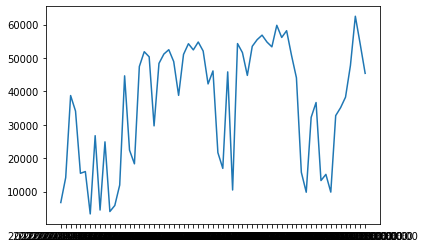

In [12]:
#visualization
pyplot.plot(days_list,values_list)
pyplot.show()

In [37]:
#feeded power into the grid
startdate = "2022-03-01" 
enddate = "2022-03-20"

urlfeed = 'https://monitoringapi.solaredge.com/site/' + site + '/energyDetails?meters=FEEDIN&timeUnit=MONTH&startTime=' + startdate + ' 00:00:00&endTime=' + enddate + ' 00:00:00&api_key=' + api_key
feedin = requests.get(urlfeed)
if feedin.status_code == 200:
    feedin = feedin.json()
    feedin_list1 = feedin['energyDetails']['meters']
    feedin = feedin_list1[0]['values'][0]['value'] #FeedIn value in Wh for full month starting from startdate

In [49]:
#create invoice
